In [96]:
import sys, os, inspect, logging, importlib

import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx

import matplotlib.pyplot as plt

In [97]:
# Get reference to GOSTNets
sys.path.append(r'../../GOSTNets/GOSTNets')
import GOSTnet as gn

In [98]:
# Define input data and create a number of output datasets if they do not yet exist
inputFolder = r'./input_folder'

input_edges = pd.read_csv(os.path.join(inputFolder, "edges.csv"))

In [99]:
input_edges

,source,target,link_id,length,cost
0,38,69,1,1304,28.977778
1,38,70,2,174,3.866667
2,36,70,3,259,10.360000
3,5,36,4,45,1.800000
4,24,5,5,77,2.200000
...,...,...,...,...,...
99,36,49,104,22,0.880000
100,50,25,105,113,4.520000
101,33,79,106,460,46.000000
102,79,80,107,257,25.700000


In [100]:
G = nx.from_pandas_edgelist(input_edges, edge_attr = 'cost')

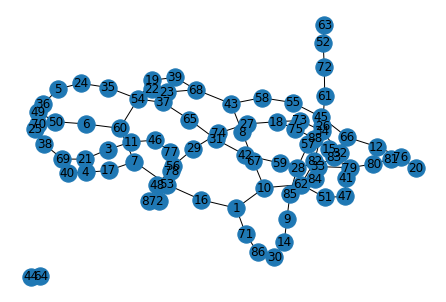

In [101]:
nx.draw(G, with_labels = True)

In [102]:
type(G)

networkx.classes.graph.Graph

## Add border nodes

In [103]:
input_nodes = pd.read_csv(os.path.join(inputFolder, "nodes.csv"))

In [104]:
input_nodes

,node_id,name,border,gauge_change
0,1,Aktau,False,False
1,2,Aktobe,False,False
2,3,Aktogal,False,False
3,4,Almaty,False,False
4,5,Andijan,True,False
...,...,...,...,...
83,84,Rustawi,True,False
84,85,Godurulum,True,True
85,86,No Name,False,False
86,87,Yaysan,True,False


In [105]:
# loop through input nodes
for index, row in input_nodes.iterrows():
    # if border node
    if row[2]:
        print(row[0],row[1])
        for entry in list(G.neighbors(row[0])):
            print('edge')
            print(entry)
            # add new intermediate node
            G.add_node(str(row[0])+'b')
            # add new edge from intermediate node to border node
            G.add_edge(str(row[0])+'b',row[0])
            # add cost to new edge with 1/2 the border cost
            # to-do
            # modify existing edge to connect to intermediate node instead of the border node
            # add new edge
            G.add_edge(entry, str(row[0])+'b', cost=G.edges[entry,row[0]]['cost'] )
            # remove edge
            G.remove_edge(entry,row[0])
    # 

5 Andijan
edge
36
edge
24
10 Baku
edge
62
edge
1
edge
67
18 Brest
edge
27
edge
75
edge
73
21 Dostyk
edge
69
edge
3
edge
4
24 Fargona
edge
35
edge
5b
27 Gomel
edge
74
edge
18b
31 Hairatan
edge
65
edge
42
34 istanbul
edge
82
edge
32
edge
61
edge
73
39 Khojadavlet/Farab
edge
68
edge
19
47 Odessa
edge
51
edge
41
52 Razi/Kapikoy
edge
72
edge
63
55 Saraks
edge
58
edge
55
edge
45
60 Tashkent
edge
7
edge
54
edge
6
62 Tbilisi
edge
84
edge
82
edge
51
edge
10b
68 Turkmenabad
edge
23
edge
43
edge
39b
70 Turugart
edge
38
edge
36
82 Kars
edge
84
edge
34b
edge
62b
83 Shamtiq
edge
33
edge
66
84 Rustawi
edge
62b
edge
82b
85 Godurulum
edge
9
edge
28
87 Yaysan
edge
48
edge
2


In [92]:
#G.edges[5,36]

{'cost': 1.8}

In [106]:
#G.edges[37,65]

In [107]:
for e in G.edges(data = True):
    # For each edge's attribute
    print(e)

(38, 69, {'cost': 28.97777778})
(38, '70b', {'cost': 3.866666667})
(69, 40, {'cost': 17.57777778})
(69, '21b', {'cost': 13.91111111})
(70, '70b', {})
(36, 49, {'cost': 0.88})
(36, '5b', {'cost': 1.8})
(36, '70b', {'cost': 10.36})
(5, '5b', {})
(24, '24b', {})
(35, 54, {'cost': 2.6})
(35, '24b', {'cost': 10.17142857})
(54, 37, {'cost': 4.285714286})
(54, 23, {'cost': 9.6})
(54, 19, {'cost': 7.114285714})
(54, '60b', {'cost': 8.571428571})
(37, 65, {'cost': 8.028571429})
(37, 23, {'cost': 7.342857143})
(37, 22, {'cost': 8.257142857})
(65, '31b', {'cost': 0.75})
(31, '31b', {})
(23, '68b', {'cost': 0.628571429})
(68, '68b', {})
(43, 58, {'cost': 2.171428571})
(43, 8, {'cost': 10.94285714})
(43, '68b', {'cost': 6.9428571429999995})
(58, '55b', {'cost': 3.4})
(55, '55b', {'cost': 0.14285714300000002})
(45, 66, {'cost': 2.575})
(45, 26, {'cost': 17.6})
(45, '55b', {'cost': 5.05})
(66, 12, {'cost': 15.575})
(66, '83b', {'cost': 4.875})
(12, 76, {'cost': 19.4})
(76, 20, {'cost': 13.3})
(39, '3

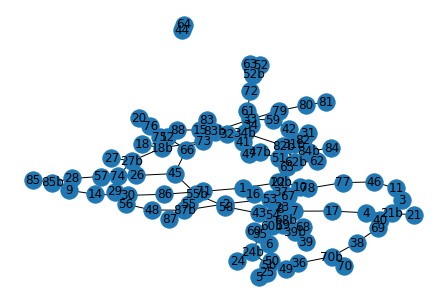

In [108]:
nx.draw(G, with_labels = True)